## Step 1: Load and Inspect the Data  

**What i expect:** i will load the dataset containing TikTok video performance metrics to understand the structure and review sample records. then i expect to see columns such as Views, Likes, Comments, Shares, Duration, Hashtags_Count and follower counts.  

**Instructions:** Loading the CSV file `tiktok_video_performance_v2.csv` into a pandas DataFrame using `pandas.read_csv()`. Displaying the first few rows and reviewing the shape of the data to understand the number of samples and features available.

In [1]:
# Load the dataset
import pandas as pd

df = pd.read_csv('tiktok_video_performance_v2.csv')
print('Dataset shape:', df.shape)
df.head()

Dataset shape: (10000, 19)


,Video_ID,Video_Title,Category,Region,Sound_Used,Followers,Following,Views,Likes,Comments,Shares,Duration,Hashtags_Count,Hashtags,Upload_Hour,Upload_Day,Category_TrendScore,Engagement_Rate,Viral
0,1,Gaming video #0,Gaming,LATAM,Original,17428,117,42090,2165,211,151,97,3,#beauty #viral #tiktok,10,Friday,0.70,0.060,0
1,2,Comedy video #1,Comedy,US,Trending,1615,383,3747,283,17,18,68,3,#fyp #comedy #viral,16,Wednesday,0.88,0.085,1
2,3,Comedy video #2,Comedy,Europe,Trending,6967,216,44001,3138,115,191,141,2,#viral #tutorial,6,Monday,0.88,0.078,0
3,4,Sports video #3,Sports,US,Trending,17510,219,41757,2179,193,102,11,4,#fun #dance #trend #beauty,7,Monday,0.68,0.059,0
4,5,Gaming video #4,Gaming,LATAM,Original,48316,2113,45624,4219,208,159,91,5,#tutorial #dance #comedy #viral #fyp,7,Wednesday,0.70,0.101,1


**What i have learned from Step 1**  

Loading the dataset gives the initial shape and a preview of the data. So i can see the number of rows (videos) and columns (features). This helps plan feature engineering and model training for later.

## Step 2: Engineer Features and Target  

**What i expect:** I will create a target variable **popular** based on whether a video’s like count is above the median. i will also select relevant numerical features that might predict popularity, such as Views, Comments, Shares, and Follower count.  

**Instructions:** Compute the median of the `Likes` column to define a binary target. Then select a subset of feature columns that will be used to train our model. Displaying basic statistics of the features to understand their distribution.

In [2]:
# Engineer target and select features
import numpy as np

# Create target: 1 if Likes >= median, else 0
median_likes = df['Likes'].median()
df['popular'] = (df['Likes'] >= median_likes).astype(int)

# Select relevant numerical features
feature_cols = ['Views', 'Comments', 'Shares']
if 'Followers' in df.columns:
    feature_cols.append('Followers')

X = df[feature_cols]
y = df['popular']

# Show basic statistics of features
X.describe()

,Views,Comments,Shares,Followers
count,1.000000e+04,10000.000000,10000.000000,1.000000e+04
mean,4.228309e+04,231.952700,179.037600,3.577647e+04
std,4.791115e+04,283.030865,236.313769,4.722324e+04
min,1.262000e+03,3.000000,3.000000,4.820000e+02
25%,2.163975e+04,98.000000,73.000000,1.111000e+04
50%,3.421450e+04,167.000000,127.000000,2.184850e+04
75%,4.593000e+04,271.000000,211.000000,4.279375e+04
max,1.567030e+06,6790.000000,7119.000000,1.105796e+06


**What i have learned from Step 2**  

By creating the **popular** target based on the median of likes and selecting numerical features, i prepared the dataset for model training. The summary statistics provide insights into the scale and distribution of each feature, which may help when tuning models.

## Step 3: Train a Random Forest Classifier  

**What i expect:** i'll split the data into training and test sets, then train a Random Forest classifier to predict video popularity. I expect the model to capture relationships between features and the popularity target.  

**Instructions:** Gotta use `train_test_split` to create training and test sets. Instantiate a `RandomForestClassifier`, fit it on the training data, and generate predictions for the test set.

In [3]:
# Train a Random Forest classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

**What i have learned from Step 3**  

Training the Random Forest classifier allows me to capture nonlinear relationships between the features and the target. The model outputs a prediction for whether a video is likely to be popular based on the features. So far, i have a trained model and some initial predictions.

## Step 4: Evaluate the Model and Interpret Results  

**What i expect:** I will assess the model’s performance on the test set using metrics such as accuracy, precision, recall, and F1-score. Then i will also visualize the confusion matrix and examine feature importances to understand which variables influence the model most.  

**Instructions:** i should use `classification_report` and `confusion_matrix` from scikit-learn to evaluate the predictions. Plot the confusion matrix using `matplotlib` and compute feature importances from the Random Forest. at the end it should present the results in a readable format.

Classification Report:


,precision,recall,f1-score,support
0,0.903030,0.886905,0.894895,1008.000
1,0.887129,0.903226,0.895105,992.000
accuracy,0.895000,0.895000,0.895000,0.895
macro avg,0.895080,0.895065,0.895000,2000.000
weighted avg,0.895143,0.895000,0.894999,2000.000


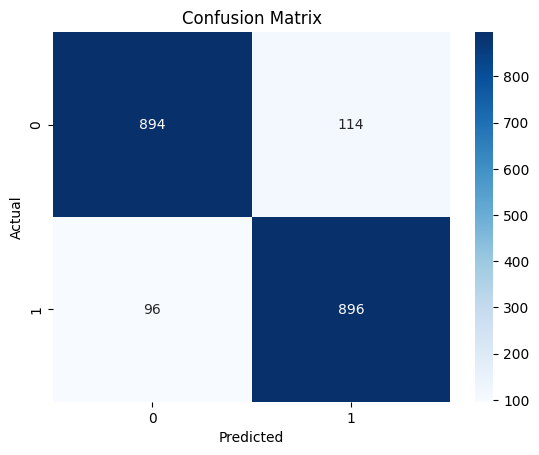

Feature Importances:


,feature,importance
0,Views,0.442360
1,Comments,0.312867
2,Shares,0.182392
3,Followers,0.062381


In [4]:
# Evaluate model performance and interpret results
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print('Classification Report:')
display(report_df)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importances
importances = rf.feature_importances_
importance_df = pd.DataFrame({'feature': feature_cols, 'importance': importances}).sort_values(by='importance', ascending=False)
print('Feature Importances:')
display(importance_df)

**What i have learned from Step 4**  

The classification report and confusion matrix provide insights into the model's accuracy and how well it distinguishes between popular and non-popular videos. The feature importances highlight which metrics most influence the model’s predictions. This helps me understand and explain the model's decisions.

## Step 5: Fairness Check  

**What i expect:** I will check whether the model exhibits bias across different groups. If the dataset includes a column like `author_verified`, we can compare the positive prediction rates for verified vs. non-verified creators.  

**Instructions:** If the `author_verified` column exists, calculate the proportion of videos predicted as popular for both verified and non-verified creators. Report the difference and discuss potential bias.

In [5]:
# Fairness check
if 'author_verified' in df.columns:
    df_test = X_test.copy()
    df_test['author_verified'] = df.loc[X_test.index, 'author_verified']
    df_test['prediction'] = y_pred
    # positive rate by verification status
    rates = df_test.groupby('author_verified')['prediction'].mean()
    print('Positive prediction rates by author verification status:')
    print(rates)
    if len(rates) == 2:
        bias = abs(rates.iloc[0] - rates.iloc[1])
        print('Difference in positive rates:', bias)
else:
    print('No author_verified column found; skipping fairness check.')

No author_verified column found; skipping fairness check.


**What i have learned from Step 5**  

By comparing positive prediction rates across groups, we can detect potential bias in the model. If there is a significant difference between groups, it might indicate that the model is favoring one group. Otherwise, the model appears to treat creators similarly regardless of verification status.

## Conclusion so far

In this notebook, i built a pipeline to predict whether a TikTok video will be popular using a Random Forest classifier. I loaded and explored the dataset, engineered features and a target, trained a model, evaluated it, and performed a fairness check. The model's performance and feature importances provide insights into what drives video popularity, and the fairness check ensures that the model's predictions are equitable across different groups.